In [ ]:
#https://archive.ics.uci.edu/ml/datasets/Hepatitis
!pip install shap

In [1]:
basepath = '/Users/99818123/Downloads/Hepatitis/'

In [2]:
import os

In [4]:
files = os.listdir(basepath)

In [5]:
files

['hepatitis.cost',
 'hepatitis.data',
 'hepatitis.delay',
 'hepatitis.expense',
 'hepatitis.group',
 'hepatitis.names',
 'hepatitis.README',
 'Index (1)']

In [71]:
tmp = open(basepath+files[5]).read().replace("        -- see the note below","").split("Attribute information")[1].split("The BILIRUBIN attribute appears to be continuously-valued")[0].split("\n")
tmp = [i for i in tmp if len(i) > 5]
cols = [ i.split(":")[0].split(".")[1].strip() for i in tmp]

In [72]:
import pandas as pd

In [81]:
tmp = open(basepath+files[1]).read()
tmp = tmp.replace("?", "None")

In [82]:
v = [ i.split(',') for i in tmp.split('\n') ] 

In [83]:
df = pd.DataFrame(v, columns=cols)

In [85]:
df.dropna( inplace=True)

In [94]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,None,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,None,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,None,1
3,2,31,1,None,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,None,200,4.0,None,1


In [103]:
df.dtypes

Class                int64
AGE                  int64
SEX                  int64
STEROID            float64
ANTIVIRALS           int64
FATIGUE            float64
MALAISE            float64
ANOREXIA           float64
LIVER BIG          float64
LIVER FIRM         float64
SPLEEN PALPABLE    float64
SPIDERS            float64
ASCITES            float64
VARICES            float64
BILIRUBIN          float64
ALK PHOSPHATE      float64
SGOT               float64
ALBUMIN            float64
PROTIME            float64
HISTOLOGY            int64
dtype: object

In [101]:
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [102]:
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [104]:
from pycaret.classification import *

In [136]:
#Cria dataset na Pycaret
dataset = setup(df, 
                target = 'Class', 
                fix_imbalance=True, 
                numeric_imputation='mean', 
                categorical_imputation='constant',
                polynomial_features=True,
                pca=False,
               )

,Description,Value
0,session_id,6131
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(155, 20)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [137]:
#Compara modelos de forma inicial
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8245,0.0000,0.8611,0.9253,0.8817,0.4934,0.5373,0.0120
rf,Random Forest Classifier,0.8245,0.9090,0.8736,0.9202,0.8856,0.4557,0.4927,0.2310
lightgbm,Light Gradient Boosting Machine,0.8245,0.8819,0.8736,0.9184,0.8831,0.4716,0.5085,0.1070
et,Extra Trees Classifier,0.8236,0.8979,0.8847,0.9082,0.8869,0.4166,0.4525,0.1990
nb,Naive Bayes,0.8155,0.9167,0.8389,0.9389,0.8733,0.4790,0.5325,0.0110
lda,Linear Discriminant Analysis,0.8155,0.8833,0.8500,0.9253,0.8751,0.4750,0.5226,0.0140
lr,Logistic Regression,0.8064,0.8861,0.8389,0.9262,0.8693,0.4694,0.5151,0.7300
xgboost,Extreme Gradient Boosting,0.7973,0.8674,0.8514,0.9103,0.8609,0.3870,0.4233,0.1320
qda,Quadratic Discriminant Analysis,0.7964,0.5000,1.0000,0.7964,0.8862,0.0000,0.0000,0.0140
ada,Ada Boost Classifier,0.7873,0.7917,0.8625,0.8858,0.8635,0.3390,0.3682,0.0500


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=6131,
                solver='auto', tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=6131,
                solver='auto', tol=0.001)

In [138]:
#Cria modelo que performou melhor
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,1.0000,1.0000,0.9000,0.9474,0.6207,0.6708
1,0.6364,0.7778,0.5556,1.0000,0.7143,0.3125,0.4303
2,0.8182,0.8889,0.7778,1.0000,0.8750,0.5600,0.6236
3,0.9091,0.6111,1.0000,0.9000,0.9474,0.6207,0.6708
4,0.9091,0.9444,0.8889,1.0000,0.9412,0.7442,0.7698
5,0.9091,0.8889,0.8889,1.0000,0.9412,0.7442,0.7698
6,0.7273,0.8750,0.7500,0.8571,0.8000,0.3774,0.3858
7,0.7273,0.8333,1.0000,0.7273,0.8421,0.0000,0.0000
8,0.9000,1.0000,0.8750,1.0000,0.9333,0.7368,0.7638
9,0.8000,1.0000,1.0000,0.8000,0.8889,0.0000,0.0000


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6131, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [139]:
#Ajusta modelo que performou melhor 

In [140]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,1.0000,1.0000,0.9000,0.9474,0.6207,0.6708
1,0.5455,0.6667,0.5556,0.8333,0.6667,0.0351,0.0430
2,0.9091,0.9167,0.8889,1.0000,0.9412,0.7442,0.7698
3,0.8182,0.8333,1.0000,0.8182,0.9000,0.0000,0.0000
4,0.8182,1.0000,0.7778,1.0000,0.8750,0.5600,0.6236
5,0.9091,0.9444,0.8889,1.0000,0.9412,0.7442,0.7698
6,0.8182,0.9167,0.7500,1.0000,0.8571,0.6207,0.6708
7,0.7273,0.8333,1.0000,0.7273,0.8421,0.0000,0.0000
8,0.8000,0.9375,0.8750,0.8750,0.8750,0.3750,0.3750
9,0.9000,1.0000,1.0000,0.8889,0.9412,0.6154,0.6667


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.4, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
               n_estimators=290, n_jobs=-1, num_leaves=8, objective=None,
               random_state=6131, reg_alpha=10, reg_lambda=0.2, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [141]:
#Faz um ensemble de modelo
ensembled_model = ensemble_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,1.0000,1.0000,0.9000,0.9474,0.6207,0.6708
1,0.8182,0.9444,0.7778,1.0000,0.8750,0.5600,0.6236
2,0.7273,0.8889,0.6667,1.0000,0.8000,0.4211,0.5164
3,0.8182,0.7778,1.0000,0.8182,0.9000,0.0000,0.0000
4,0.7273,1.0000,0.6667,1.0000,0.8000,0.4211,0.5164
5,0.8182,0.8889,0.7778,1.0000,0.8750,0.5600,0.6236
6,0.8182,0.8750,0.8750,0.8750,0.8750,0.5417,0.5417
7,0.7273,0.7917,1.0000,0.7273,0.8421,0.0000,0.0000
8,0.9000,1.0000,0.8750,1.0000,0.9333,0.7368,0.7638
9,0.9000,1.0000,1.0000,0.8889,0.9412,0.6154,0.6667


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:BaggingClassifier(base_estimator=LGBMClassifier(bagging_fraction=0.4,
                                                bagging_freq=2,
                                                boosting_type='gbdt',
                                                class_weight=None,
                                                colsample_bytree=1.0,
                                                feature_fraction=1.0,
                                                importance_type='split',
                                                learning_rate=0.1, max_depth=-1,
                                                min_child_samples=11,
                                                min_child_weight=0.001,
                                                min_split_gain=0,
                                                n_estimators=290, n_jobs=-1,
                                   

In [142]:
#Constrói modelos para combinarmos
catboost = create_model('catboost')
lightgbm = create_model('lightgbm')
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,1.0000,1.0000,0.9000,0.9474,0.6207,0.6708
1,0.5455,0.6667,0.4444,1.0000,0.6154,0.2254,0.3563
2,0.7273,0.6667,0.6667,1.0000,0.8000,0.4211,0.5164
3,0.8182,0.7778,1.0000,0.8182,0.9000,0.0000,0.0000
4,0.9091,0.9444,0.8889,1.0000,0.9412,0.7442,0.7698
5,0.9091,0.8889,0.8889,1.0000,0.9412,0.7442,0.7698
6,0.7273,0.8750,0.7500,0.8571,0.8000,0.3774,0.3858
7,0.7273,0.9167,1.0000,0.7273,0.8421,0.0000,0.0000
8,0.9000,1.0000,0.8750,1.0000,0.9333,0.7368,0.7638
9,0.8000,0.9375,1.0000,0.8000,0.8889,0.0000,0.0000


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=6131, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)
INFO:logs:create_model() succesfully completed......................................


In [143]:
#Blenda os modelos criados acima
blend_all = blend_models(estimator_list=[xgboost, lightgbm, catboost])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,1.0000,1.0000,0.9000,0.9474,0.6207,0.6708
1,0.6364,0.7222,0.5556,1.0000,0.7143,0.3125,0.4303
2,0.8182,0.7778,0.7778,1.0000,0.8750,0.5600,0.6236
3,0.8182,0.7222,1.0000,0.8182,0.9000,0.0000,0.0000
4,0.9091,0.9444,0.8889,1.0000,0.9412,0.7442,0.7698
5,0.9091,0.8889,0.8889,1.0000,0.9412,0.7442,0.7698
6,0.7273,0.9167,0.7500,0.8571,0.8000,0.3774,0.3858
7,0.7273,0.9167,1.0000,0.7273,0.8421,0.0000,0.0000
8,0.9000,1.0000,0.8750,1.0000,0.9333,0.7368,0.7638
9,0.8000,1.0000,1.0000,0.8000,0.8889,0.0000,0.0000


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=-1...
                                            

In [144]:
#Ajusta e aproxima o blend de modelos

In [145]:
blend_tunado = tune_model(blend_all)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9091,1.0000,1.0000,0.9000,0.9474,0.6207,0.6708
1,0.6364,0.7222,0.5556,1.0000,0.7143,0.3125,0.4303
2,0.8182,0.7778,0.7778,1.0000,0.8750,0.5600,0.6236
3,0.8182,0.7222,1.0000,0.8182,0.9000,0.0000,0.0000
4,0.9091,0.9444,0.8889,1.0000,0.9412,0.7442,0.7698
5,0.9091,0.8889,0.8889,1.0000,0.9412,0.7442,0.7698
6,0.8182,0.9167,0.7500,1.0000,0.8571,0.6207,0.6708
7,0.7273,0.9167,1.0000,0.7273,0.8421,0.0000,0.0000
8,0.9000,1.0000,0.8750,1.0000,0.9333,0.7368,0.7638
9,0.8000,1.0000,1.0000,0.8000,0.8889,0.0000,0.0000


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=-1...
                                           

In [146]:
#Constrói um modelo de processo sequencial
stacked_models = stack_models(estimator_list=[xgboost, knn, catboost])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7273,0.9444,0.6667,1.0000,0.8000,0.4211,0.5164
2,0.7273,0.8889,0.8889,0.8000,0.8421,-0.1379,-0.1491
3,0.9091,0.9444,1.0000,0.9000,0.9474,0.6207,0.6708
4,0.9091,0.9444,0.8889,1.0000,0.9412,0.7442,0.7698
5,0.9091,0.8889,0.8889,1.0000,0.9412,0.7442,0.7698
6,0.8182,0.8750,0.8750,0.8750,0.8750,0.5417,0.5417
7,0.7273,0.5000,1.0000,0.7273,0.8421,0.0000,0.0000
8,0.8000,1.0000,0.7500,1.0000,0.8571,0.5455,0.6124
9,0.9000,1.0000,1.0000,0.8889,0.9412,0.6154,0.6667


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:StackingClassifier(cv=StratifiedKFold(n_splits=10,
        random_state=RandomState(MT19937) at 0x15413719EB8, shuffle=False),
                   estimators=[('xgboost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=...
                                <catboost.core.CatBoostClassifier object at 0x000001541BF8D710>)],
                   final_estimator

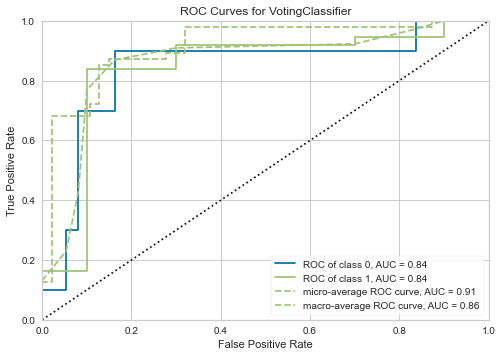

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [147]:
plot_model(blend_tunado)

In [148]:
evaluate_model(blend_tunado)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(use_train_data=False, groups=None, feature_name=None, fit_kwargs=None, fold=None, estimator=VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=-1...
  

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(X_new_sample=None, use_train_data=False, estimator=LGBMClassifier(bagging_fraction=0.4, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
               n_estimators=290, n_jobs=-1, num_leaves=8, objective=None,
               random_state=6131, reg_alpha=10, reg_lambda=0.2, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), save=False, plot=summary, observation=None, kwargs={}, feature=None)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


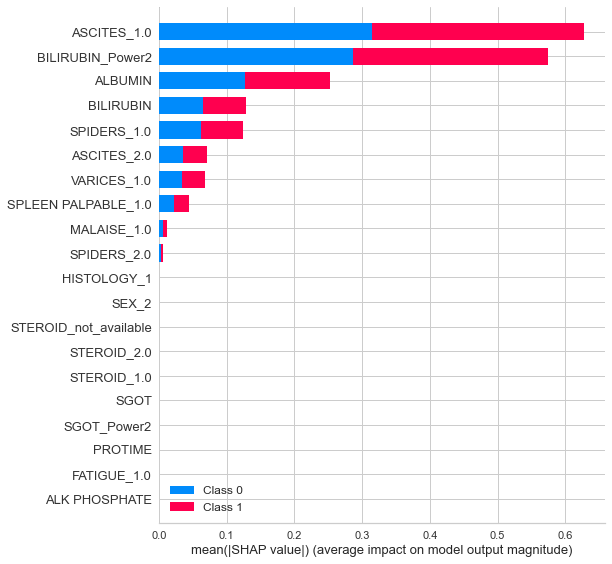

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [149]:
interpret_model(tuned_model)